In [1]:
import sys
from pathlib import Path
from tqdm import tqdm
from PIL import Image
import pandas as pd
import random

sys.path.append(str(Path("..").resolve()))
from src import *

In [2]:
dataset = ObjaverseDataset3D()

In [3]:
TESTSET_DIR = Path("./dataset/test")
testset = pd.read_csv(TESTSET_DIR / "metadata.csv")
testset.index = pd.Series(testset.uv_file_name.map(lambda x: Path(x).stem), name="uid")

In [4]:
gt_dir = TESTSET_DIR / "diffuse"
vanilla_dir = Path("tests/lllyasviel-sd-controlnet-mlsd")
trained_dir = Path("tests/SD1.5_CNmlsd_96bs_1e-5lr_8k_masked-gt_4920s")

In [ ]:
files = list(trained_dir.glob("*.png"))
sample_files = random.sample(files, k=3)
sample_files = files[:5]

captions, gt_renders, vanilla_renderings, trained_renderings = [], [], [], []
for i, file in enumerate(sample_files):
    uid = Path(file).stem
    captions.append(testset.caption[uid])
    obj = dataset[uid]
    gt_renders.append(obj.render(views=1)[0])

    obj.set_texture(str(vanilla_dir / f"{uid}.png"))
    vanilla_renderings.append(obj.render(views=1)[0])

    obj.set_texture(str(trained_dir / f"{uid}.png"))
    trained_renderings.append(obj.render(views=1)[0])

a glowing, metallic sword with a fiery orange hilt and a dark, textured blade, featuring a detailed guard and a sharp, pointed tip.


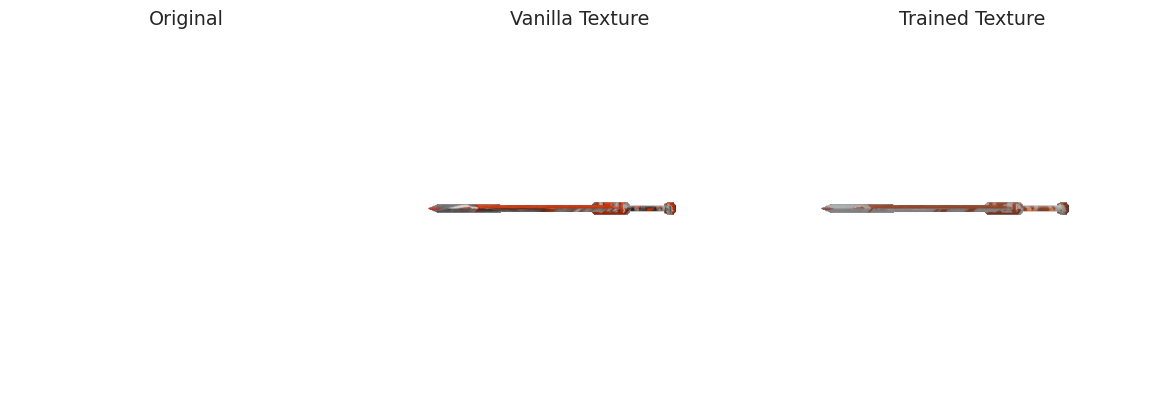

a spherical object with a smooth, matte finish exhibits a gradient of colors from white at the top to a darker shade at the bottom, suggesting a layered structure with varying densities.


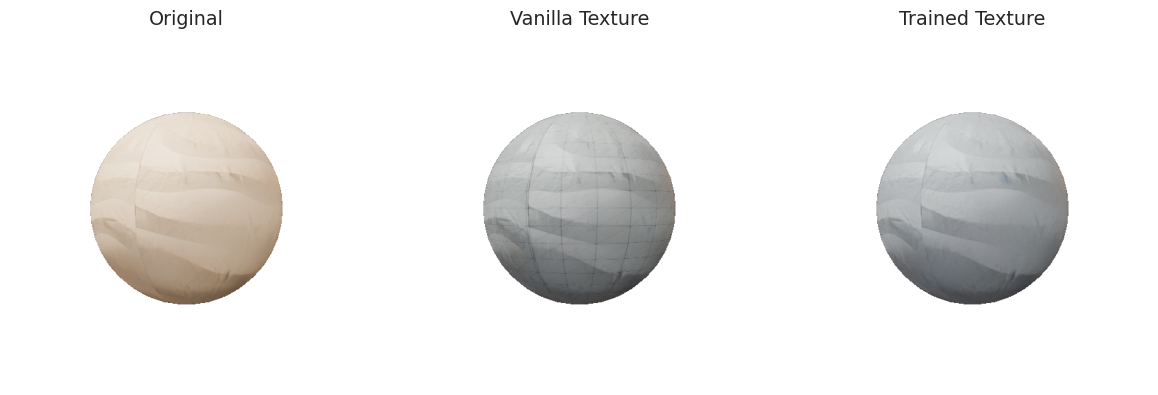

a blue, spherical robot with a smooth, reflective surface and sharp, angular edges. it has four limbs with a metallic finish and a central body with a matte texture. the color is a uniform shade of blue with highlights and shadows that suggest a glossy finish.


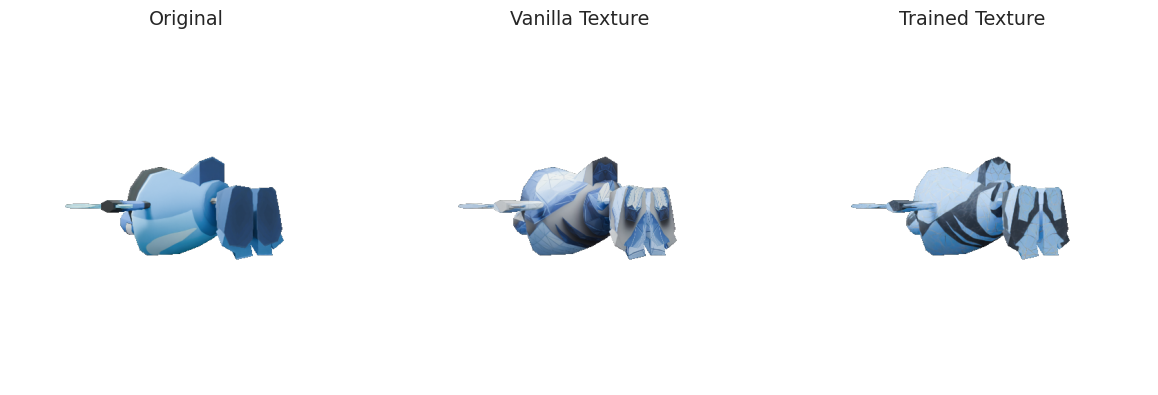

a modern woven armchair with a dark gray color and a textured fabric, featuring a geometric design with a high back and armrests.


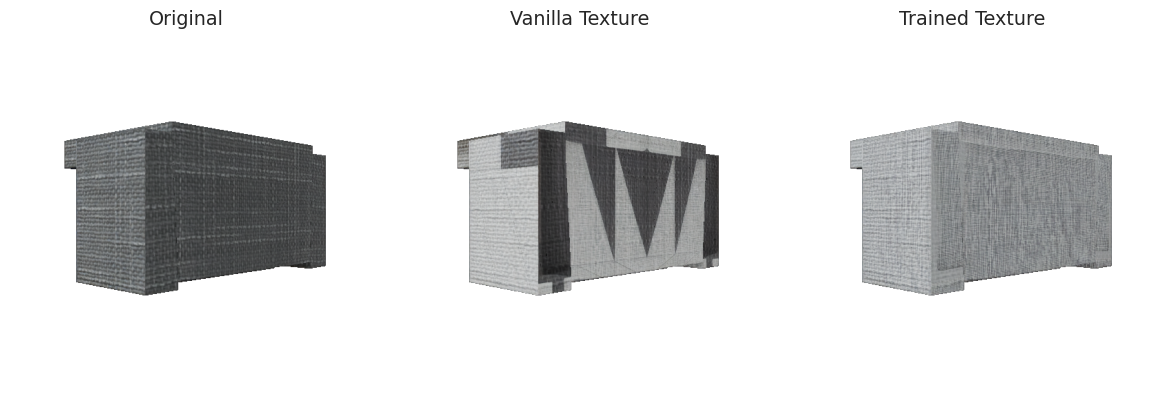

a rustic wooden stool with a round seat and a handle, featuring a weathered texture and a natural wood color palette.


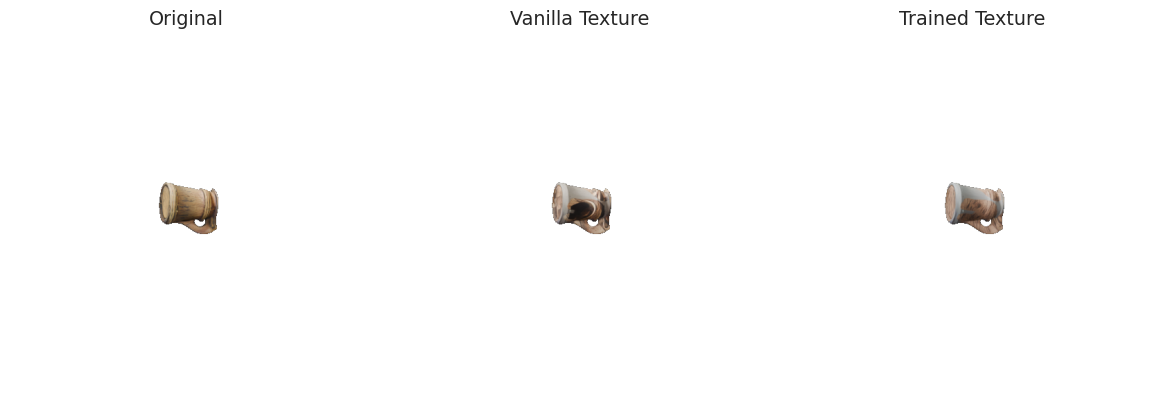

In [12]:
for caption, gt_render, vanilla_rendering, trained_rendering in zip(
    captions, gt_renders, vanilla_renderings, trained_renderings
):
    cprint(f"green:{caption}")
    plot_images(
        images={
            "Original": gt_render,
            "Vanilla Texture": vanilla_rendering,
            "Trained Texture": trained_rendering,
        },
        size=4,
    )